In [1]:
import json
from ConfigParser import SafeConfigParser
from operator import add
import matplotlib.pyplot as plt 

config = '/home/ellery/wikimedia/missing_articles/missing_articles.ini'
cp = SafeConfigParser()
cp.read(config)

exp_dir = 'en_lda'
base_dir = os.path.join(cp.get('general', 'local_data_dir'), exp_dir)
hadoop_base_dir = os.path.join(cp.get('general', 'hadoop_data_dir'), exp_dir)
contribution_file = os.path.join(hadoop_base_dir, cp.get('eval', 'contributions')) 



In [13]:
def get_counts(filename, min_bytes):
    contributions = sc.textFile( filename)
    
    def count(line):
        l = json.loads(line)['contributions']
        return (len([1 for x in l if float(x['bytes_added']) >= min_bytes]), 1)
    
    counts = contributions.map(count).reduceByKey(add)
    local_counts = counts.collect()
    local_counts.sort()
    return local_counts
    

In [14]:
def plot_icdf (filename, min_bytes, k):
    counts = get_counts(filename, min_bytes)
    total = sum( (t[1] for t in counts))
    curr = total
    ccdf = []
    n = []
    
    for i in range(k):
        ccdf.append(curr)
        n.append(counts[i][0])
        curr -= counts[i][1]
    plt.plot(n, ccdf)
    plt.xlabel('n')
    plt.ylabel('num people who made at least n edits')

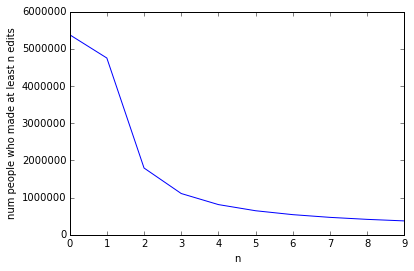

In [15]:
plot_icdf (contribution_file, 10, 10)

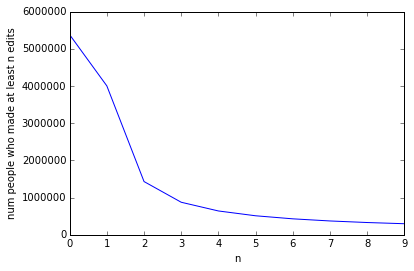

In [16]:
plot_icdf (contribution_file, 100, 10)